In [1]:
import tensorflow as tf
import keras

In [2]:
# Mount Google Drive (to access dataset and save model)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files

uploaded = files.upload()  # Upload .zip file

Saving Dataset.zip to Dataset.zip


In [4]:
import zipfile

with zipfile.ZipFile('Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')


In [5]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob

In [7]:
IMAGE_SIZE=[224,224]
train_path="/content/drive/MyDrive/Dataset/training"
validation_path="/content/drive/MyDrive/Dataset/test"

In [8]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
for layer in vgg16.layers:
  layer.trainable=False

In [10]:
for layer in vgg16.layers:
  print(layer.name, layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [11]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
folder=glob("/content/drive/MyDrive/Dataset/training/*")

In [13]:
folder

['/content/drive/MyDrive/Dataset/training/cats',
 '/content/drive/MyDrive/Dataset/training/dogs']

In [14]:
x = Flatten()(vgg16.output)

In [15]:
prediction = Dense(len(folder), activation='softmax')(x)

In [16]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [17]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [18]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(
    rescale=1./255
)

In [20]:
training_set=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dataset/training",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
    )

Found 8005 images belonging to 2 classes.


In [21]:
test_set=test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dataset/test",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
    )

Found 2023 images belonging to 2 classes.


In [23]:
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    verbose=1  # default
)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 162s 645ms/step - accuracy: 0.9211 - loss: 0.1941 - val_accuracy: 0.9174 - val_loss: 0.2075
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 201s 642ms/step - accuracy: 0.9193 - loss: 0.1937 - val_accuracy: 0.9110 - val_loss: 0.2569
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 214s 689ms/step - accuracy: 0.9427 - loss: 0.1483 - val_accuracy: 0.9259 - val_loss: 0.2113
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 195s 661ms/step - accuracy: 0.9449 - loss: 0.1355 - val_accuracy: 0.9239 - val_loss: 0.2132
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 165s 655ms/step - accuracy: 0.9389 - loss: 0.1551 - val_accuracy: 0.9308 - val_loss: 0.2050
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 164s 653ms/step - accuracy: 0.9427 - loss: 0.1360 - val_accuracy: 0.9303 - val_loss: 0.2167
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 198s 638ms/step - accuracy: 0.9523 - loss: 0.1165 - val_accuracy: 0.9343 - val_loss: 0.2101
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 172s 683ms/step - accuracy: 0.9475 -

In [24]:
import matplotlib.pyplot as plt

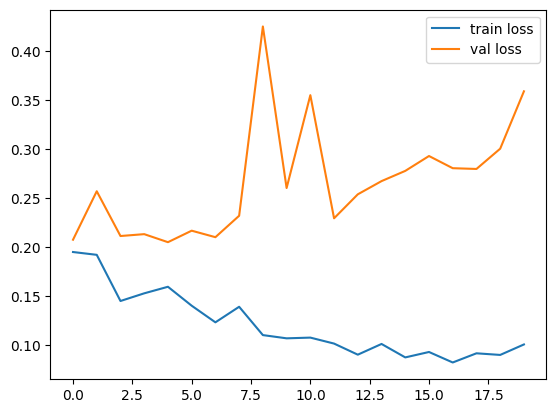

In [25]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()



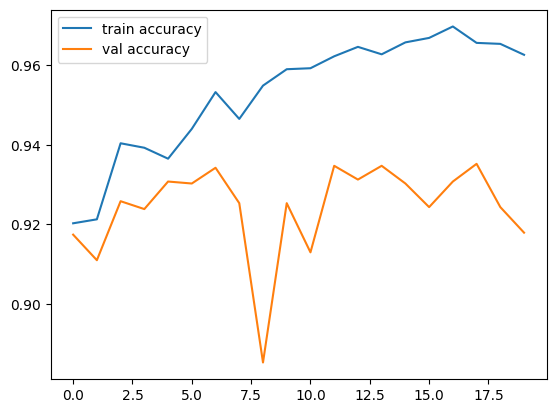

In [26]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [27]:
model.save("cat_vs_dog.h5")